# Khadija Amin

# LGMVIP Task5-Intermediate level Task: EDA on Dataset Terrorism

# Dataset link:https://drive.google.com/file/d/1luTU7xBvI7QAGPbQMxEHcgKUi9d6UeP_/view

In [287]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [194]:
data=pd.read_csv("globalterrorismdb_0718dist.csv",encoding ="ISO-8859-1")
data.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14344\2609713778.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("globalterrorismdb_0718dist.csv",encoding ="ISO-8859-1")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Dataset Info

In [195]:
data.shape

(181691, 135)

In [196]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [197]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

# Rename the Columns

In [198]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'nationalities','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','country':'Country','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [199]:
data = data[['Year','Month','day','State','Region','Country','City','nationalities','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]
     

In [200]:
data.head()

,Year,Month,day,State,Region,Country,City,nationalities,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,NaN,Central America & Caribbean,58,Santo Domingo,Dominican Republic,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Federal,North America,130,Mexico city,Mexico,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Tarlac,Southeast Asia,160,Unknown,Philippines,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Attica,Western Europe,78,Athens,Greece,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Fukouka,East Asia,101,Fukouka,Japan,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [9]:
data.shape

(181691, 18)

# Analysing the Data

In [229]:
print("Country with the most attacks:",data['nationalities'].value_counts().idxmax())
print("City with the most attacks:",data['City'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",data['Region'].value_counts().idxmax())
print("Year with the most attacks:",data['Year'].value_counts().idxmax())
print("Month with the most attacks:",data['Month'].value_counts().idxmax())
print("Group with the most attacks:",data['Group'].value_counts().index[1])
print("Most Attack Types:",data['Attacktype'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


# Top 10 Countries with the most Attacks

In [233]:
country_counts = data['nationalities'].value_counts().head(10)
country_counts

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: nationalities, dtype: int64

# Bar graph for top 10 Countries with the most Attacks

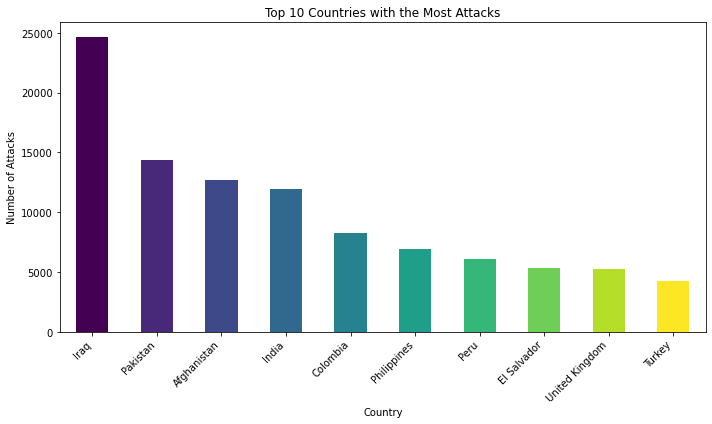

In [259]:
country_counts = data['nationalities'].value_counts().head(10)
# Create a bar graph for Top 10 Countries with the most attacks
colors=plt.cm.viridis(np.linspace(0, 1, len(country_counts)))
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar',color=colors)
plt.title('Top 10 Countries with the Most Attacks')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

# Top 10 Cities with the most Attacks

In [272]:
city_counts = data['City'].value_counts().drop('Unknown').head(10)
city_counts

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

# Bar graph for top 10 Cities with the most Attacks

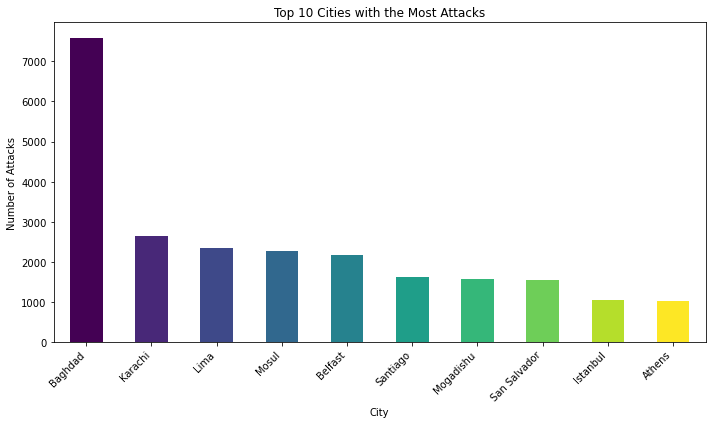

In [257]:
colors=plt.cm.viridis(np.linspace(0, 1, len(city_counts)))
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar',color=colors)
plt.title('Top 10 Cities with the Most Attacks')
plt.xlabel('City')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

# Top 10 Regions with the most Attacks

In [273]:
region_counts = data['Region'].value_counts().head(10)
region_counts

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64

# Bar graph for Top 10 Regions with the most Attacks

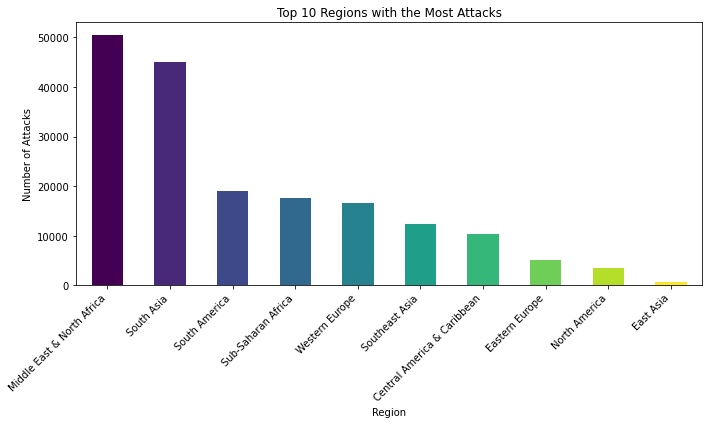

In [255]:
colors=plt.cm.viridis(np.linspace(0, 1, len(region_counts)))
plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar',color=colors)
plt.title('Top 10 Regions with the Most Attacks')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')  # Rotate the region labels for better readability
plt.tight_layout()
plt.show()

# Top 10 Years with the most Attacks

In [274]:
year_counts = data['Year'].value_counts().head(10)
year_counts

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: Year, dtype: int64

#  Bar graph for Top 10 Years with the most Attacks

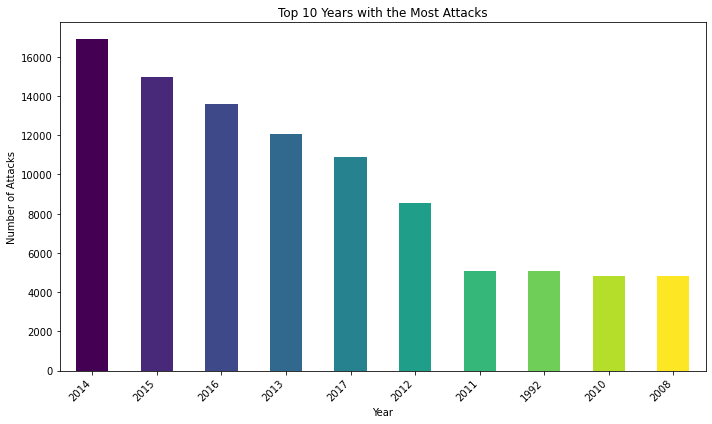

In [254]:
colors=plt.cm.viridis(np.linspace(0, 1, len(year_counts)))
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar',color=colors)
plt.title('Top 10 Years with the Most Attacks')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')  # Rotate the year labels for better readability
plt.tight_layout()
plt.show()

# Top 10 Months with the most Attacks

In [276]:
month_counts = data['Month'].value_counts().head(10)
month_counts

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
Name: Month, dtype: int64

# Bar graph for Top 10 Months with the most Attacks

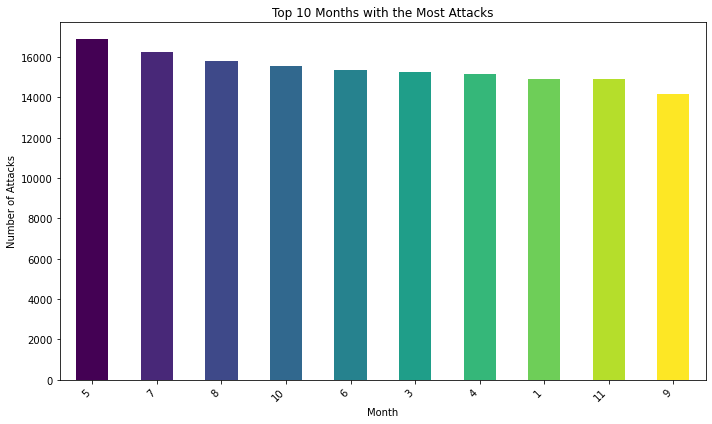

In [253]:
plt.figure(figsize=(10, 6))
colors=plt.cm.viridis(np.linspace(0, 1, len(month_counts)))
month_counts.plot(kind='bar',color=colors)
plt.title('Top 10 Months with the Most Attacks')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

# Top 10 Groups with the most Attacks

In [277]:
group_counts = data['Group'].value_counts().drop('Unknown').head(10)
group_counts

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: Group, dtype: int64

# Bar graph for Top 10 Groups with the most Attacks

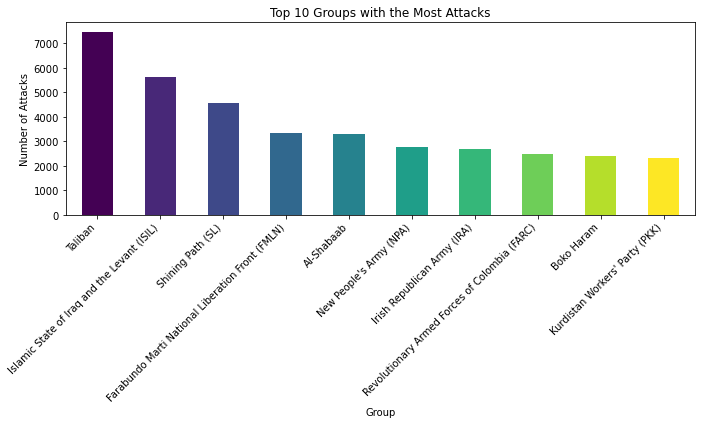

In [250]:
plt.figure(figsize=(10, 6))
colors=plt.cm.viridis(np.linspace(0, 1, len(group_counts)))
group_counts.plot(kind='bar',color=colors)
plt.title('Top 10 Groups with the Most Attacks')
plt.xlabel('Group')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')  # Rotate the group labels for better readability
plt.tight_layout()
plt.show()

# Top 10 Attack Types

In [279]:
attack_type_counts = data['Attacktype'].value_counts().head(10)
attack_type_counts

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attacktype, dtype: int64

# Bar graph for Top 10 Attack Types

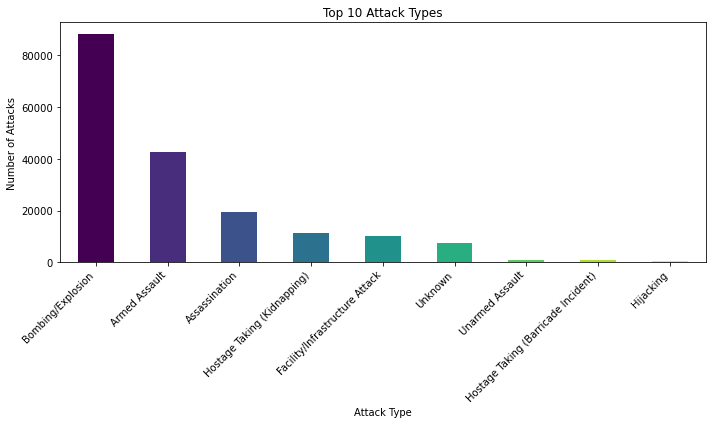

In [247]:
colors=plt.cm.viridis(np.linspace(0, 1, len(attack_type_counts)))
plt.figure(figsize=(10, 6))
attack_type_counts.plot(kind='bar',color=colors)
plt.title('Top 10 Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')  # Rotate the attack type labels for better readability
plt.tight_layout()
plt.show()

# Attacks vs Year

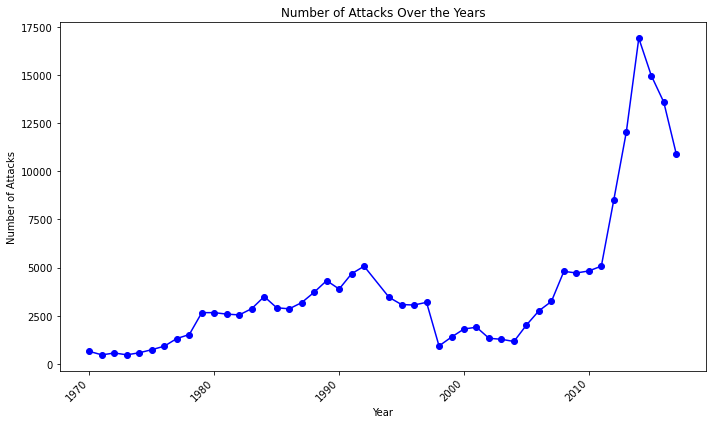

In [263]:
# Group the data by year and count the number of attacks for each year
attacks_by_year = data.groupby('Year').size()
plt.figure(figsize=(10, 6))
attacks_by_year.plot(kind='line', marker='o', color='b')
plt.title('Number of Attacks Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


# killed vs Survived

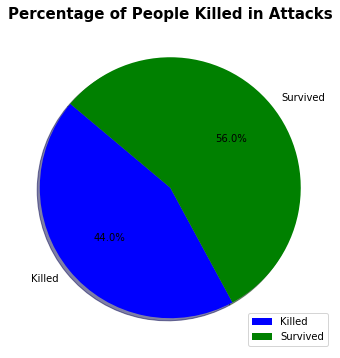

In [264]:
total_victims = data['kill'].sum() + data['Wound'].sum()

# Calculate the total number of people killed in all attacks
total_killed = data['kill'].sum()

# Calculate the percentage of people killed
percentage_killed = (total_killed / total_victims) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
labels = ['Killed', 'Survived']
sizes = [percentage_killed, 100 - percentage_killed]
colors = ['blue', 'green']

plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of People Killed in Attacks',fontweight='bold',fontsize=15)
plt.legend()
plt.show()


# Successful and Unsuccessful attacks over the years

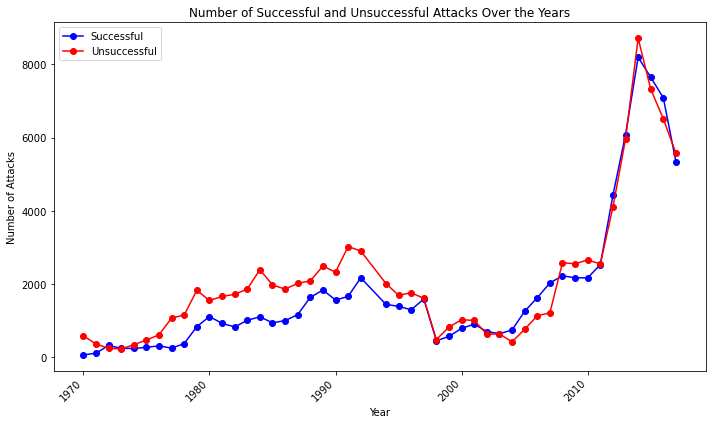

In [265]:
# Create a new column 'Success' based on the assumption
data['Success'] = data['kill'] > 0

# Group the data by year and count the number of successful and unsuccessful attacks for each year
attacks_by_year = data.groupby(['Year', 'Success']).size().unstack(fill_value=0)

# Create a line graph for successful and unsuccessful attacks over the years
plt.figure(figsize=(10, 6))
plt.plot(attacks_by_year.index, attacks_by_year[True], label='Successful', marker='o', color='b')
plt.plot(attacks_by_year.index, attacks_by_year[False], label='Unsuccessful', marker='o', color='r')
plt.title('Number of Successful and Unsuccessful Attacks Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')  
plt.legend()
plt.tight_layout()
plt.show()


In [280]:
# Analyze the most common summary themes or keywords in terrorist attacks
most_common_summary_keywords = data['summary'].str.lower().str.split().explode().value_counts().head(20)
most_common_summary_keywords

the               371505
in                210857
a                 119329
of                115588
no                112490
and               111607
were               99538
claimed            98368
for                91576
group              84796
responsibility     84671
was                84416
on                 62478
assailants         55538
an                 54241
to                 53874
at                 51624
killed             48666
attack.            39709
one                39105
Name: summary, dtype: int64

# Summary Analysis

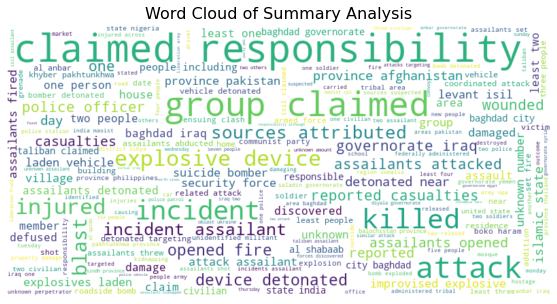

In [281]:
from wordcloud import WordCloud
summary_text = ' '.join(data['summary'].dropna().astype(str).str.lower())

# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis ticks and labels
plt.title('Word Cloud of Summary Analysis', fontsize=16)
plt.show()


# Terrorism Analysis Report

Region Most Attacked: Middle East & North Africa

The Middle East & North Africa region experienced the highest number of terrorist attacks according to the dataset.

Country in the Region Most Attacked: Iraq

Among the countries in the Middle East & North Africa, Iraq had the highest number of recorded terrorist attacks.

City in the Country Most Attacked: Baghdad

Baghdad, the capital city of Iraq, suffered the highest number of terrorist attacks within the country.

Target Type Attacked: Private Citizens & Property

Private Citizens & Property were the most frequently targeted in the recorded terrorist attacks.

Attack Type Used: Bombing/Explosion

The most commonly used attack type was Bombing/Explosion, indicating the prevalence of explosive-related attacks.

Group Who Attacked: Taliban

The Taliban was identified as the group responsible for the majority of the recorded attacks.

Countries These Groups Belong To: Iraq

The Taliban group was associated with attacks primarily in Iraq.

Year in Which Most Attacks Occurred: 2014 with 16903 Attacks

The year 2014 recorded the highest number of terrorist attacks, with 16,903 incidents.